In [1]:
import numpy as np
import bima
from matplotlib import pyplot as plt
from bima import Config

In [2]:
arr = np.array([[1, -1, 0, 0, 0, -1, 0], [2, 0.5, 0, 0, 0, 0.5, 0]])
initial = bima.Initial.from_arr(arr)
print(initial)

[Initial(m=1.000000000, r=(-1.000000000, 0.000000000, 0.000000000), v=(0.000000000, -1.000000000, 0.000000000)), Initial(m=2.000000000, r=(0.500000000, 0.000000000, 0.000000000), v=(0.000000000, 0.500000000, 0.000000000))]


In [3]:
config = Config(
    force=bima.ForceMethod.Direct,
    solve=bima.SolveMethod.Euler,
    timestep=bima.TimestepMethod.Constant(0.00001),
    close_encounter=bima.CloseEncounterMethod.Regularized
)

sim = bima.Simulation(initial)

record = sim.in_memory.run(config, 20)

[##################################################] 100.00% (2000001) [2305582 it/s]


In [4]:
record = np.array(record)
print(record.shape)
print(record[0, :5])

(2, 2000003, 7)
[[ 0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00 -1.00000000e-05  0.00000000e+00
   0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 1.00000000e-05 -1.00000000e+00 -2.00000000e-05  0.00000000e+00
   8.88888889e-06 -1.00000000e+00  0.00000000e+00]
 [ 2.00000000e-05 -1.00000000e+00 -3.00000000e-05  0.00000000e+00
   1.77777778e-05 -1.00000000e+00  0.00000000e+00]]


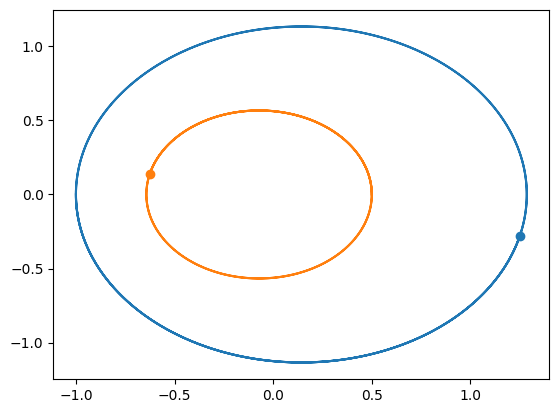

In [5]:
length = record.shape[1]
sample_n = 1000
skip = length//sample_n

x1 = record[0, ::skip, 1]
y1 = record[0, ::skip, 2]
x2 = record[1, ::skip, 1]
y2 = record[1, ::skip, 2]

fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.scatter(x1[-1], y1[-1])
ax.plot(x2, y2)
ax.scatter(x2[-1], y2[-1])
plt.show()
